# Cluster Analysis
K-Means code adopted from:<br>
https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/#:~:text=Python%20Implementation%20of%20K%20means%20Clustering%20K%20means,clusters%2C%20based%20on%20having%20similar%20features%2C%20common%20patterns.

Documentation: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


## Import Libraries

In [13]:
!pip install kneed

zsh:1: /usr/local/bin/pip: bad interpreter: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: no such file or directory
  Using cached kneed-0.8.2-py3-none-any.whl (10 kB)

[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: pip3 install --upgrade pip


In [14]:
import matplotlib.pyplot as plt

import numpy 
numpy.__version__ 
'1.21.4' 

from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

## Make Synthetic Data

In [15]:
features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

### Print Synthetic Data
Note that in reality we would never apply clustering to labeled data.  What would be the point?  But here we show true labels so we can see how "well" the clustering performs.

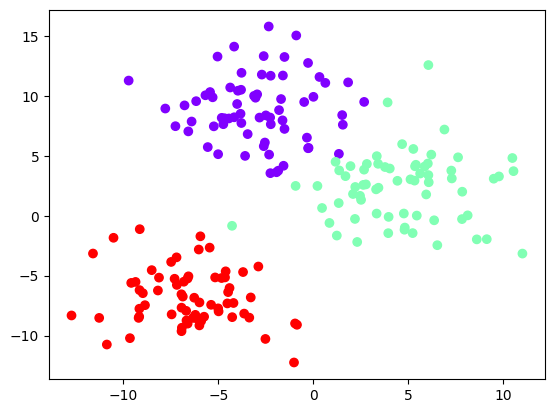

In [16]:
plt.scatter(features[:,0],features[:,1],c=true_labels[:],cmap='rainbow')

In [17]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_features.shape

(200, 2)

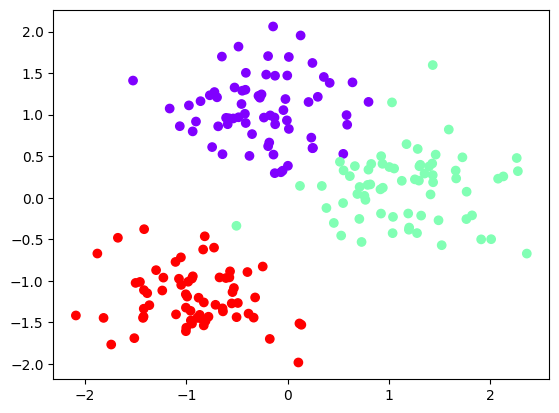

In [18]:
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=true_labels[:],cmap='rainbow')

## Set the parameters for our K-Means clustering

One oddity to note about K-Means clustering is that in order to figure out which "k" to use you actually run the clustering algorithm for all the values of k and then pick the one you like best...

In [19]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, init="random", n_init=10, max_iter=300)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

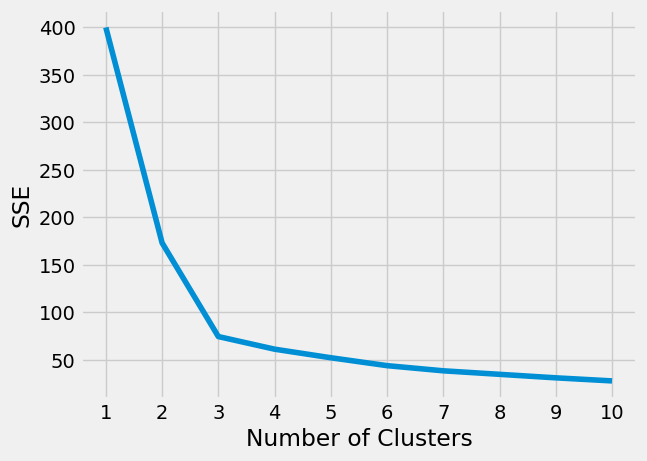

In [36]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

It looks to me like **k=3** is the best value for k.  

Lets look at silhouette score too

In [39]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k,n_init="auto")
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

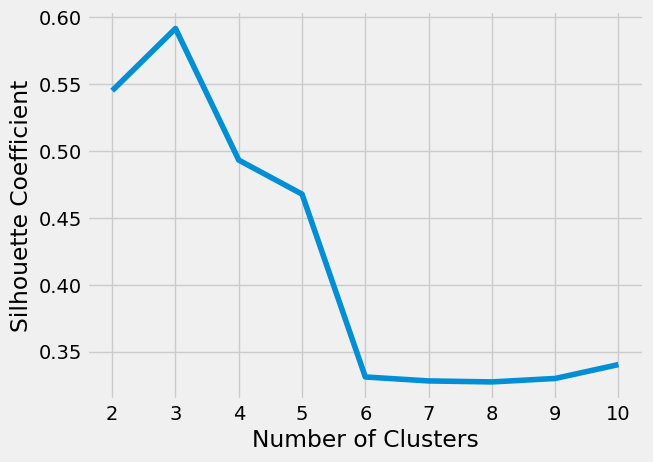

In [40]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

There is a clear peak in silhouette score at 3 clusters which is another indicator we should choose 3 clusters.

Prior to running the k-means cluster we will use we need to parameterize the model

In [23]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

Next we fit the model and output another scatter plot showing how k-means assigned labels to points. 

In [24]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

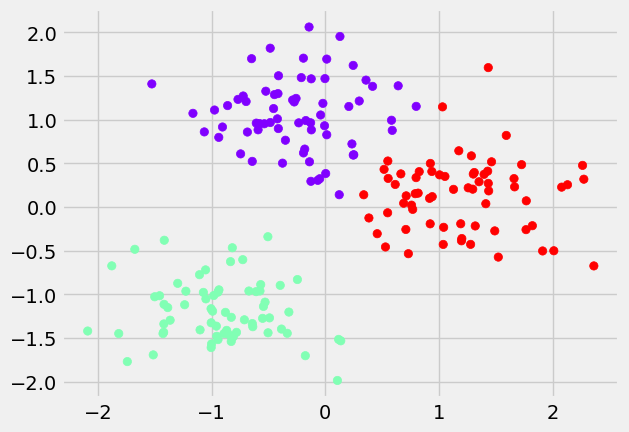

In [25]:
identified_clusters = kmeans.fit_predict(scaled_features)
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=identified_clusters[:],cmap='rainbow')

Let us see what happens for some other choices of k.

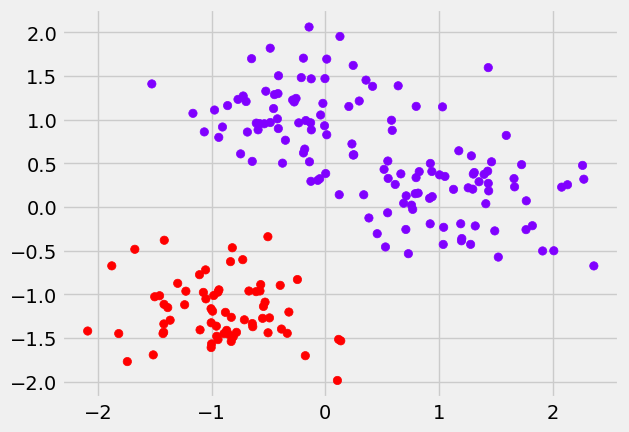

In [26]:
#k=2

kmeans = KMeans(
    init="random",
    n_clusters=2,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)

identified_clusters = kmeans.fit_predict(scaled_features)

plt.scatter(scaled_features[:,0],scaled_features[:,1],c=identified_clusters[:],cmap='rainbow')


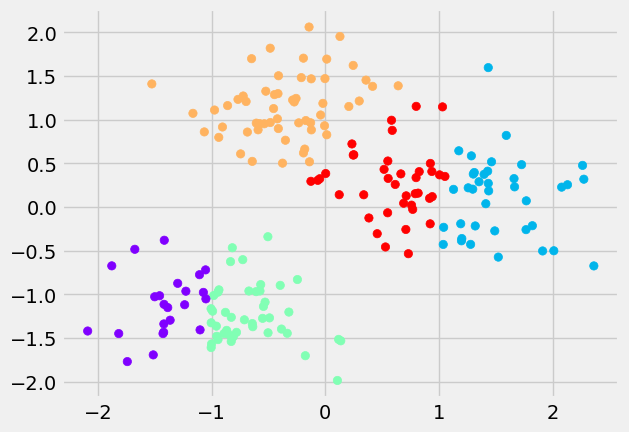

In [27]:
#k=5

kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)

identified_clusters = kmeans.fit_predict(scaled_features)

plt.scatter(scaled_features[:,0],scaled_features[:,1],c=identified_clusters[:],cmap='rainbow')

From: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


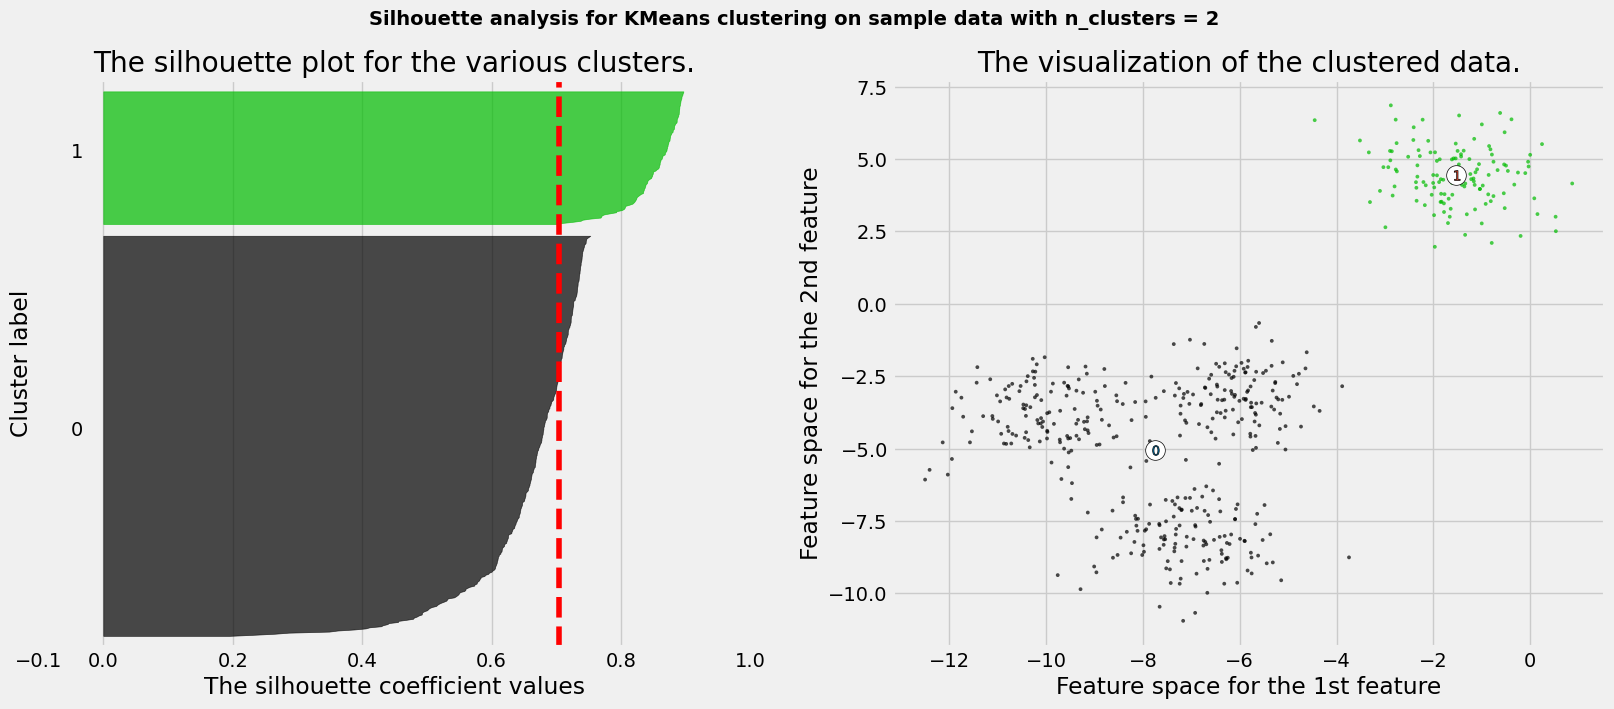

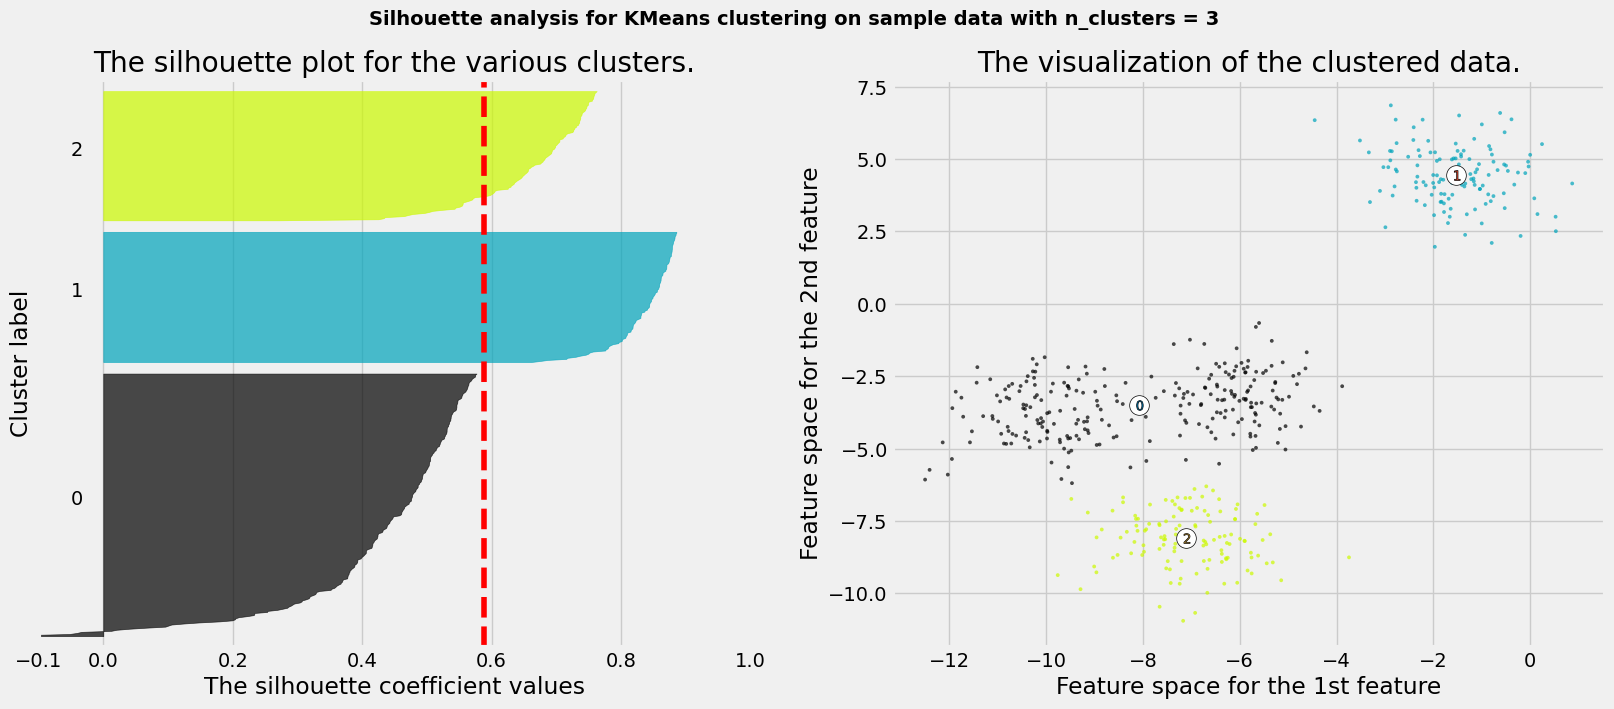

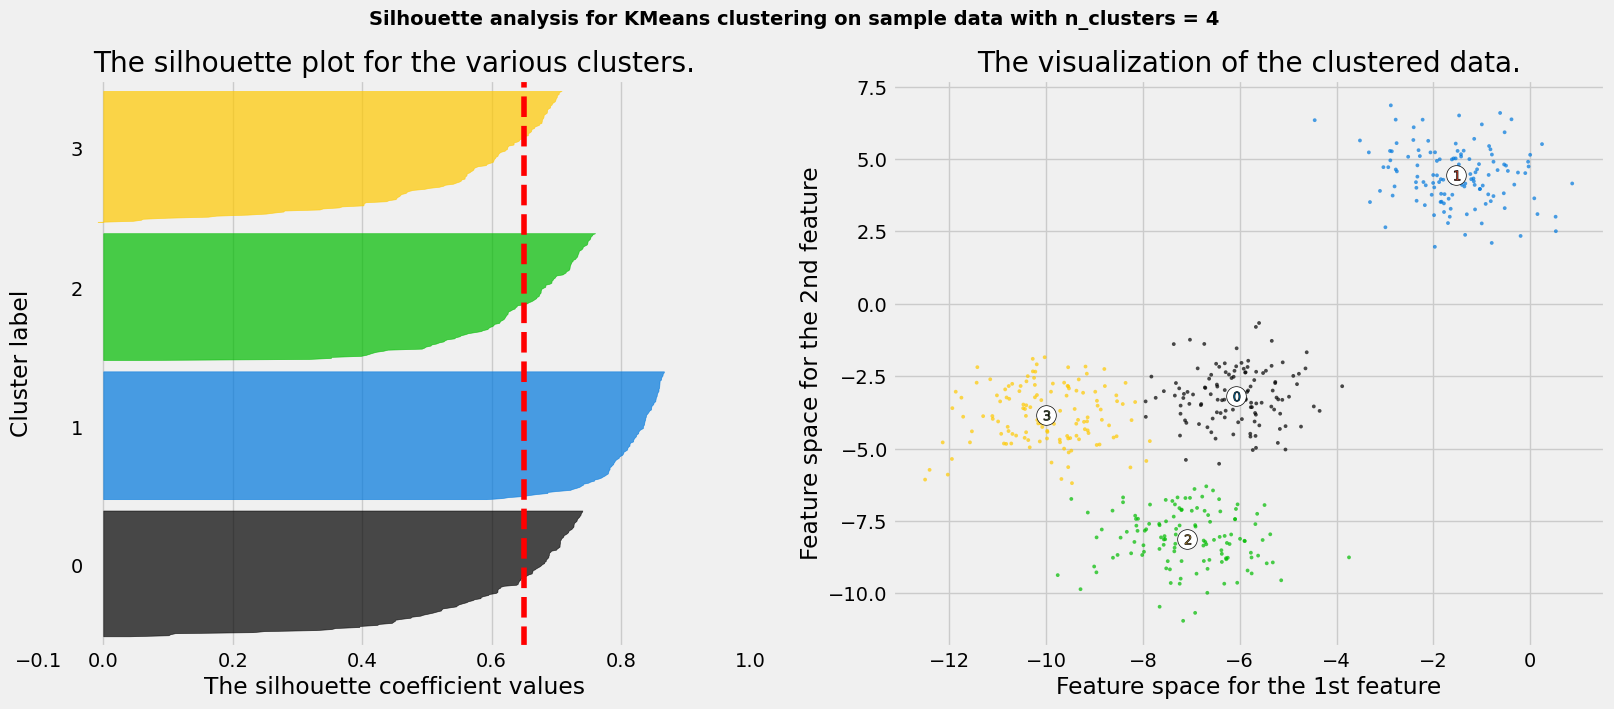

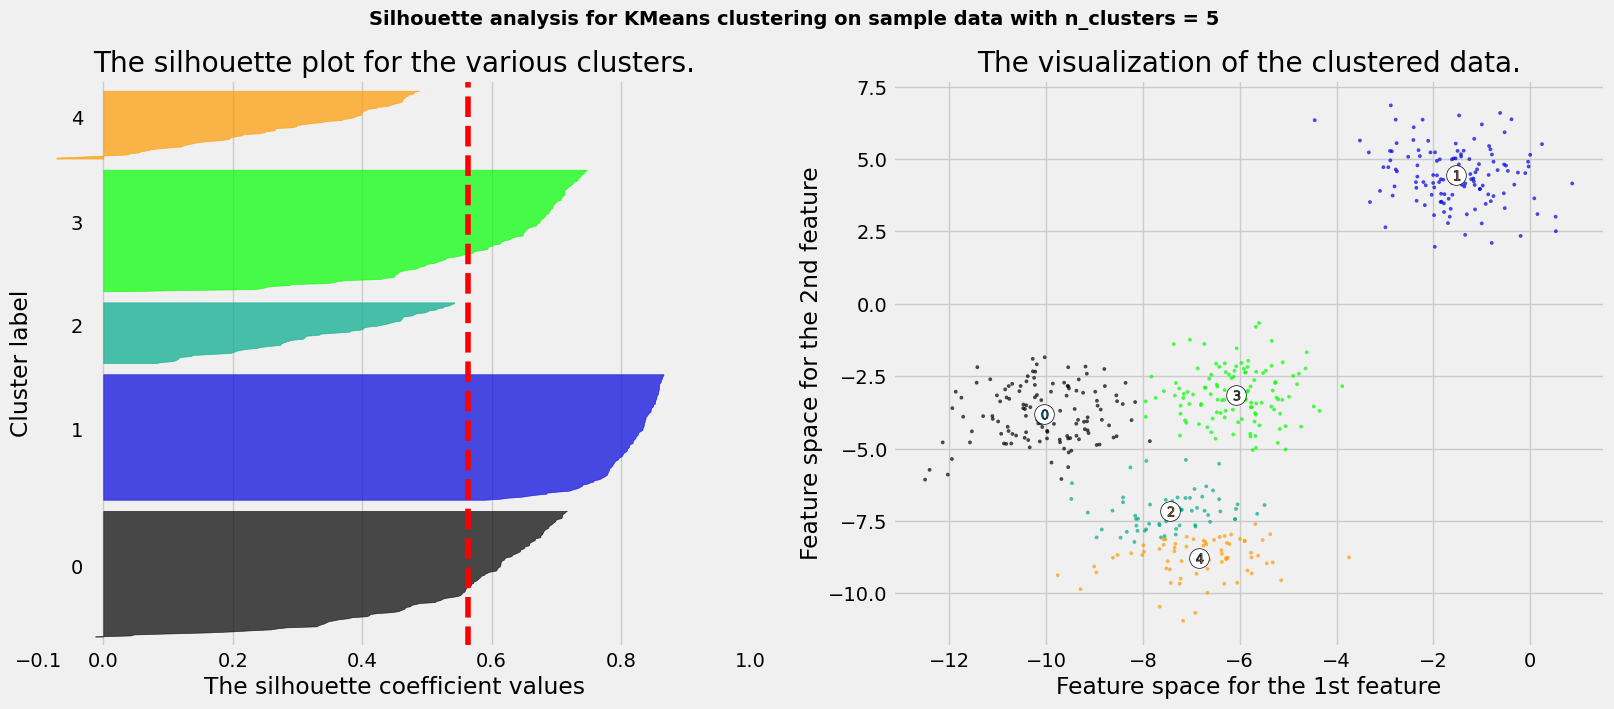

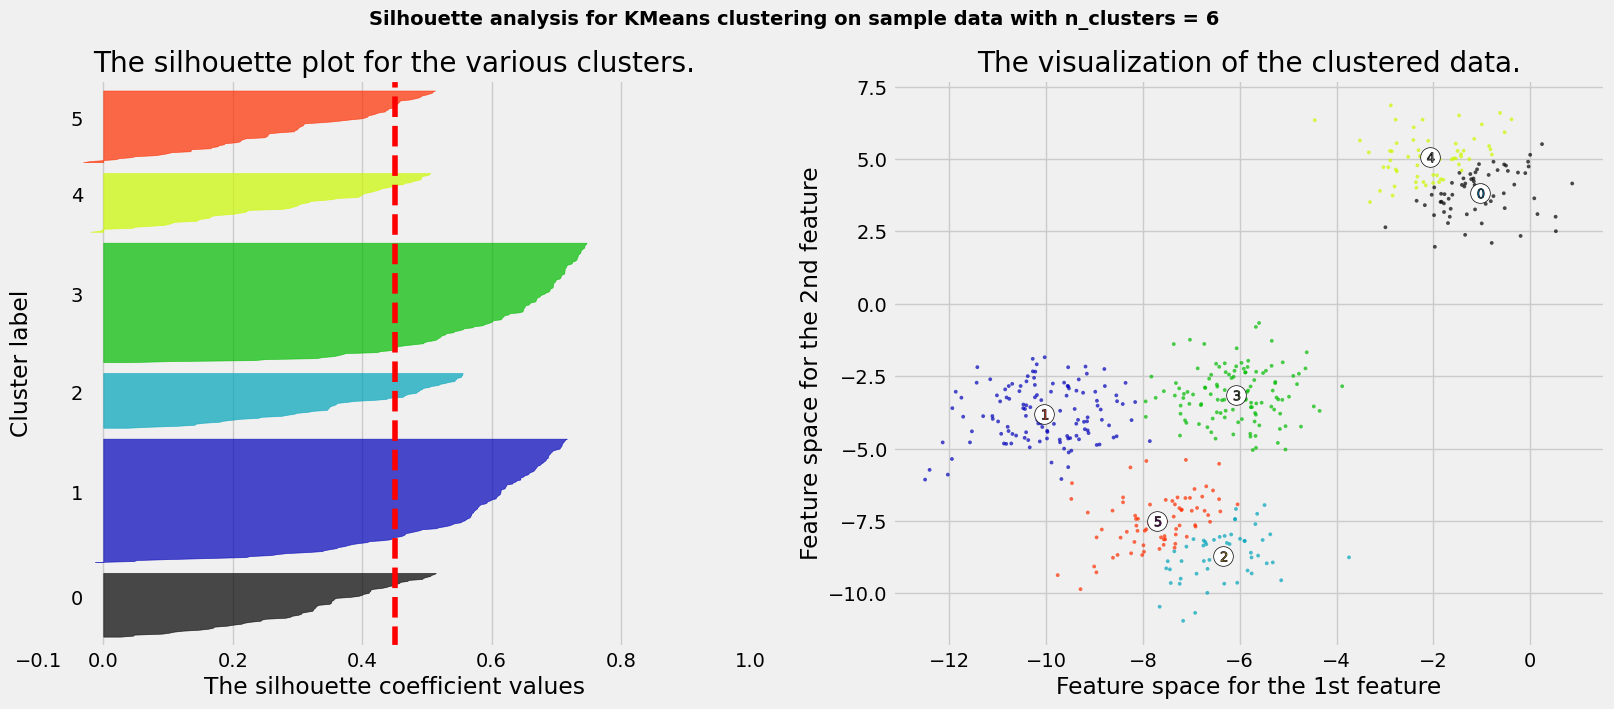

In [28]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

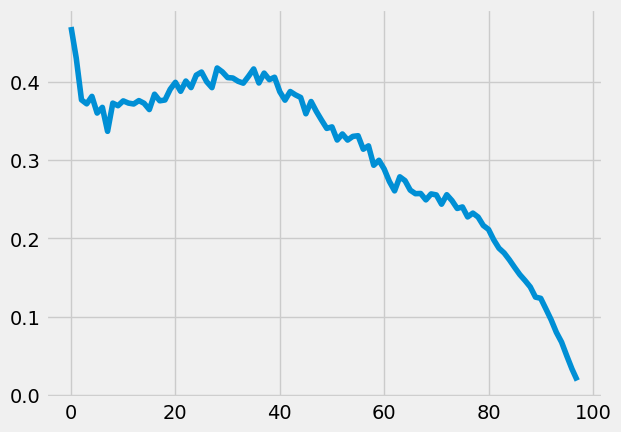

In [29]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=100,
    n_features=2,
    centers=6,
    cluster_std=4,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

averages = []

for n_clusters in range(2,len(y)):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    #print(
    #    "For n_clusters =",
    #    n_clusters,
    #    "The average silhouette_score is :",
    #    silhouette_avg,
    #)
    averages.append(silhouette_avg)

    # Compute the silhouette scores for each sample
    #sample_silhouette_values = silhouette_samples(X, cluster_labels)


#fig, ax1, = plt.subplots()
plt.plot(averages)

plt.show()

## Hierachial Clustering
 Code is based on turotial: https://www.askpython.com/python/examples/hierarchical-clustering

In [30]:
from scipy.cluster.hierarchy import dendrogram , linkage
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Creating the model
agg_clustering = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')

In [32]:
#predicting the labels
labels = agg_clustering.fit_predict(scaled_features)

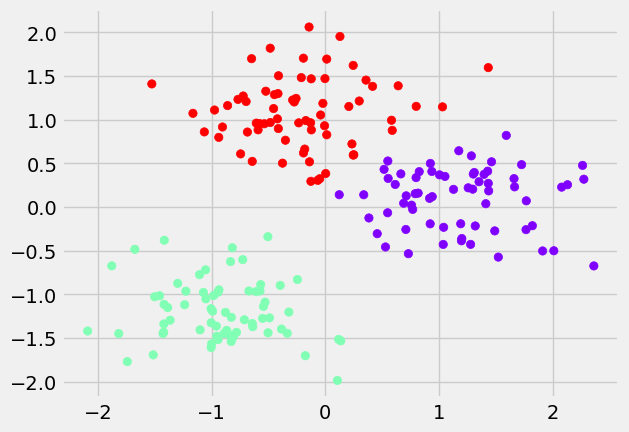

In [33]:
#Plotting the results
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=labels[:],cmap='rainbow')

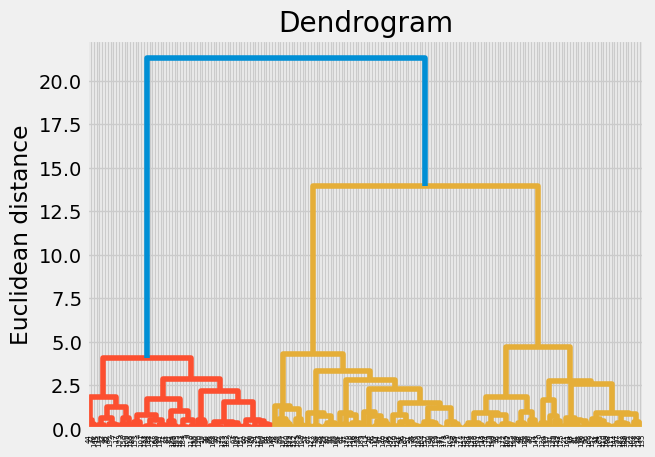

In [34]:
#Linkage Matrix
Z = linkage(scaled_features, method = 'ward')
 
#plotting dendrogram
dendro = dendrogram(Z)
plt.title('Dendrogram')
plt.ylabel('Euclidean distance')
plt.show()

Lets look at Hierachial models using some other linkages

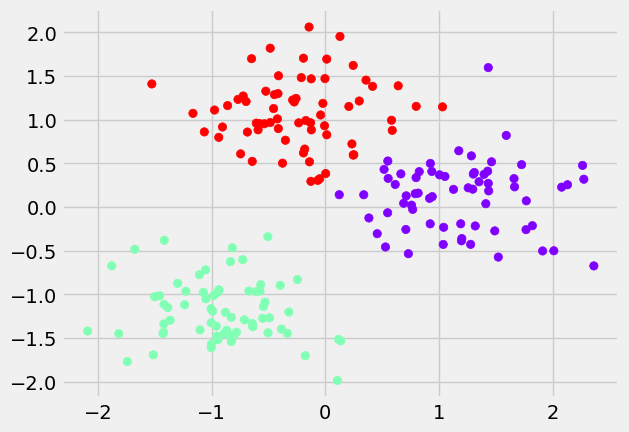

In [35]:
#linkage possibilities {“ward”, “complete”, “average”, “single”}, default=”ward”.

#Creating the model
agg_clustering = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'average')

#predicting the labels
labels = agg_clustering.fit_predict(scaled_features)

#Plotting the results
plt.scatter(scaled_features[:,0],scaled_features[:,1],c=labels[:],cmap='rainbow')